<img src='./imgs/pinguino3-export.png' width='300' align='right' style='filter: drop-shadow(10px 5px 10px #423f3b)'>

# Análisis multivariado
El análisis multivariado es un conjunto de técnicas estadísticas que se utilizan para estudiar el comportamiento de múltiples variables al mismo tiempo. Se usa para entender cómo se relacionan y afectan entre sí las variables, y para predecir el comportamiento de una variable dada en función de la interacción de varias otras variables. Es útil para modelar relaciones complejas entre variables que no se pueden capturar fácilmente con modelos de una sola variable.
***

## Importar librerías y cargar datos

In [75]:
# Importar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import scipy.stats
import statsmodels.formula.api as smf
import janitor

# Para ignorar warnings
import warnings
warnings.filterwarnings('ignore')

In [76]:
# Cargar datos
datos_procesados = pd.read_csv('./dataset/datos_procesados.csv')
datos_procesados.drop('Unnamed: 0', axis=1, inplace=True)
datos_procesados.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [77]:
# Crear el aspecto general de los gráficos
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6f69',
    'Gentoo': '#96ceb4',
    'Chinstrap': '#ffeead'
}

comparation_color = {
    'actual_value': '#000000',
    'prediction_model_5': '#e06666',
    'prediction_model_4': '#f6b26b',
    'prediction_model_3': '#d9ead3',
    'prediction_model_2': '#b6d7a8',
    'prediction_model_1': '#fff2cc'
}

## Análisis de regresión múltiple

El análisis de regresión múltiple es una técnica que se utiliza para estimar las relaciones entre una variable dependiente (también conocida como variable objetivo o respuesta) y una o más variables independientes (también conocidas como predictores, covariables, factores o variables explicativas). En este análisis, se estima cuánto aumenta o disminuye la variable dependiente cuando se cambia una de las variables independientes. Esto se logra a través de la estimación de los coeficientes de regresión para cada variable independiente. El análisis de regresión múltiple es útil para comprender cómo las variables independientes influyen en la variable dependiente y para predecir el valor de la variable dependiente en función de los valores de las variables independientes.

### Crear modelos para capturar el dato correspondiente al peso de los pingüinos

In [78]:
# Modelo 1
model_1 = (
    smf.ols(
        formula = 'body_mass_g ~ bill_length_mm',
        data = datos_procesados
    )
    .fit()
)

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     176.2
Date:                Tue, 20 Dec 2022   Prob (F-statistic):           1.54e-32
Time:                        16:21:24   Log-Likelihood:                -2629.1
No. Observations:                 333   AIC:                             5262.
Df Residuals:                     331   BIC:                             5270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        388.8452    289.817      1.342      0.181    -181.271     958.961
bill_length_mm    86.7918      6.538     13.276      0.000      73.931      99.652
==============================================================================
Omnibus:                        6.141   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.899
Skew:                          -0.197   Prob(JB):                       0.0864
Kurtosis:                       2.555   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

La pendiente de la longitud del pico (bill_length_mm) es de 86. Esto significa que por cada cambio en la logitud del pico de un pingüino se estaría esperando un cambio de 86 gramos.

In [79]:
# Modelo 2
model_2 = (
    smf.ols(
        formula = 'body_mass_g ~ bill_length_mm + bill_depth_mm', # Es como el modelo anterior pero le suma una tercera variable
        data = datos_procesados
    )
    .fit()
)

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     144.8
Date:                Tue, 20 Dec 2022   Prob (F-statistic):           7.04e-46
Time:                        16:21:24   Log-Likelihood:                -2595.2
No. Observations:                 333   AIC:                             5196.
Df Residuals:                     330   BIC:                             5208.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3413.4519    437.911      7.795      0.000    2552.002    4274.902
bill_length_mm    74.8126      6.076     12.313      0.000      62.860      86.765
bill_depth_mm   -145.5072     16.873     -8.624      0.000    -178.699    -112.315
==============================================================================
Omnibus:                        2.839   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                2.175
Skew:                          -0.000   Prob(JB):                        0.337
Kurtosis:                       2.604   Cond. No.                         644.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Ahora la pendiente de la longitud del pico es de 74 (un cambio de 74 gramos). Con respecto a la altura del pico (bill_depth_mm), se observa que a mayor pico se esperaría que un pingüino pese menos.

In [80]:
# Modelo 3
model_3 = (
    smf.ols(
        formula = 'body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm',
        data = datos_procesados
    )
    .fit()
)

model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     354.9
Date:                Tue, 20 Dec 2022   Prob (F-statistic):          9.26e-103
Time:                        16:21:24   Log-Likelihood:                -2459.8
No. Observations:                 333   AIC:                             4928.
Df Residuals:                     329   BIC:                             4943.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6445.4760    566.130    -11.385      0.000   -7559.167   -5331.785
bill_length_mm        3.2929      5.366      0.614      0.540      -7.263      13.849
bill_depth_mm        17.8364     13.826      1.290      0.198      -9.362      45.035
flipper_length_mm    50.7621      2.497     20.327      0.000      45.850      55.675
==============================================================================
Omnibus:                        5.596   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                5.469
Skew:                           0.312   Prob(JB):                       0.0649
Kurtosis:                       3.068   Cond. No.                     5.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Los coeficientes como es de esperarse han cambiado. Y un punto interesante a destacar es que el R cuadrado (que dice qué tanta de la variabilidad de los datos se está ajustando) del modelo 3 es más alto que el de los modelos anteriores. Esto quiere decir que los resultados del modelo 3 son más precisos.

In [81]:
# Modelo 4
model_4 = (
    smf.ols(
        formula = 'body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm + C(sex)', # Los modelos de regresion múltiple admiten variables categóricas
        data = datos_procesados
    )
    .fit()
)

model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     381.3
Date:                Tue, 20 Dec 2022   Prob (F-statistic):          6.28e-122
Time:                        16:21:24   Log-Likelihood:                -2411.8
No. Observations:                 333   AIC:                             4834.
Df Residuals:                     328   BIC:                             4853.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2288.4650    631.580     -3.623      0.000   -3530.924   -1046.006
C(sex)[T.male]      541.0285     51.710     10.463      0.000     439.304     642.753
bill_length_mm       -2.3287      4.684     -0.497      0.619     -11.544       6.886
bill_depth_mm       -86.0882     15.570     -5.529      0.000    -116.718     -55.459
flipper_length_mm    38.8258      2.448     15.862      0.000      34.011      43.641
==============================================================================
Omnibus:                        2.598   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                2.125
Skew:                           0.062   Prob(JB):                        0.346
Kurtosis:                       2.629   Cond. No.                     7.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

A partir del incremento en el R cuadrado, se puede decir que hasta el momento el modelo 4 es el que mejor va capturando la variabilidad de los datos

In [82]:
# Modelo 5
model_5 = (
    smf.ols(
        formula = 'body_mass_g ~ flipper_length_mm + C(sex)',
        data = datos_procesados
    )
    .fit()
)

model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     684.8
Date:                Tue, 20 Dec 2022   Prob (F-statistic):          3.53e-118
Time:                        16:21:25   Log-Likelihood:                -2427.2
No. Observations:                 333   AIC:                             4860.
Df Residuals:                     330   BIC:                             4872.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5410.3002    285.798    -18.931      0.000   -5972.515   -4848.085
C(sex)[T.male]      347.8503     40.342      8.623      0.000     268.491     427.209
flipper_length_mm    46.9822      1.441     32.598      0.000      44.147      49.817
==============================================================================
Omnibus:                        0.262   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.376
Skew:                           0.051   Prob(JB):                        0.829
Kurtosis:                       2.870   Cond. No.                     2.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

El modelo 5 es más simple que los anteriores e igual arroja una precisión alta.

### Visualizar resultados

Para tener una comparacion óptima del comportamiento de cada modelo con el comportamiento de los datos, primero crear una tabla de comparacion con la predicción de cada modelo y los datos reales.

In [83]:
# Crear tabla de resultados
models_results = pd.DataFrame(
    dict(
        actual_value = datos_procesados.body_mass_g,
        prediction_model_1 = model_1.predict(),
        prediction_model_2 = model_2.predict(),
        prediction_model_3 = model_3.predict(),
        prediction_model_4 = model_4.predict(),
        prediction_model_5 = model_5.predict(),
        species = datos_procesados.species,
        sex = datos_procesados.sex
    )
)

models_results 

,actual_value,prediction_model_1,prediction_model_2,prediction_model_3,prediction_model_4,prediction_model_5,species,sex
0,3750.0,3782.402961,3617.641192,3204.761227,3579.136946,3441.323750,Adelie,male
1,3800.0,3817.119665,3836.725580,3436.701722,3343.220772,3328.384372,Adelie,female
2,3250.0,3886.553073,3809.271371,3906.897032,3639.137335,3751.223949,Adelie,female
3,3450.0,3574.102738,3350.786581,3816.705772,3457.954243,3657.259599,Adelie,female
4,3650.0,3799.761313,3356.140070,3696.168128,3764.536023,3864.163327,Adelie,male
...,...,...,...,...,...,...,...,...
328,4000.0,5231.825347,4706.954140,4599.187485,4455.022405,4662.860306,Chinstrap,male
329,3400.0,4164.286703,4034.121055,4274.552753,3894.857519,4080.099176,Chinstrap,female
330,3775.0,4693.716437,4475.927353,3839.563668,4063.639819,4005.109853,Chinstrap,male
331,4100.0,4797.866549,4449.296758,4720.740455,4652.013882,4803.806832,Chinstrap,male


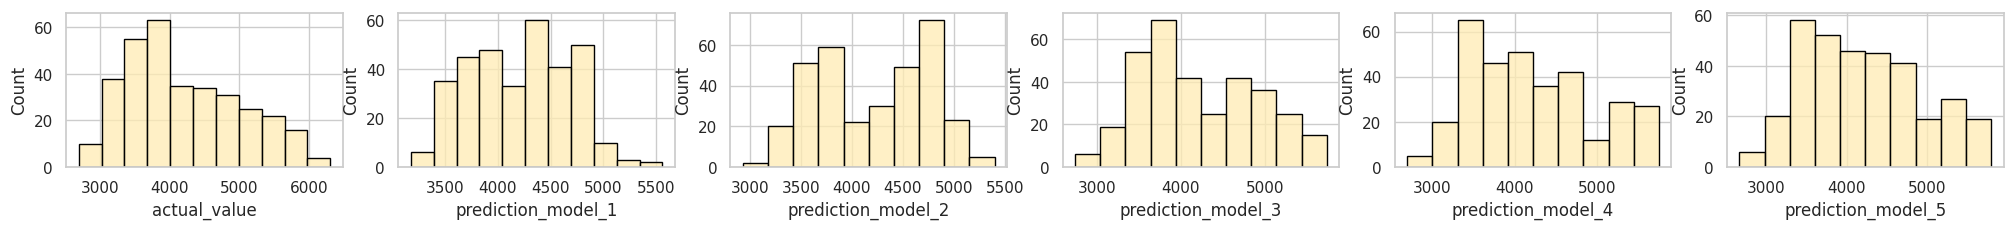

In [84]:
# Gráficar la distribución de cada variable
variables = models_results.select_dtypes(include=np.number).columns

fig,ax = plt.subplots(1, len(variables), figsize=(25, 2))

for i in range(len(variables)):
    sns.histplot( 
        ax = ax[i],
        data = models_results,
        x = variables[i],
        color = '#ffecb3',
        edgecolor = 'black',
        multiple = 'stack'
    );

La distribución que se muestra en actual_value está un poco sesgada. También a simple vista se nota que el modelo que más se asemeja con la distribución de actual_value es la del modelo 5.

También para comparar el comportamiento de cada modelo se puede hacer uso de las funciones acumuladas de probabilidad:

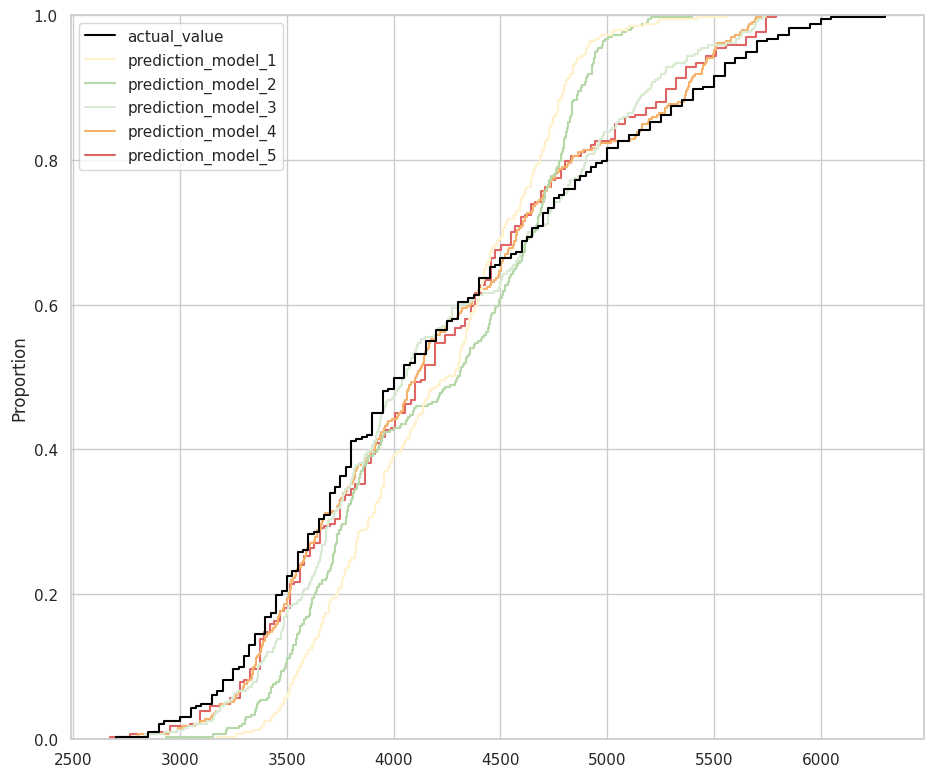

In [85]:
# ECDFs
sns.ecdfplot(
    data = models_results,
    palette = comparation_color
);

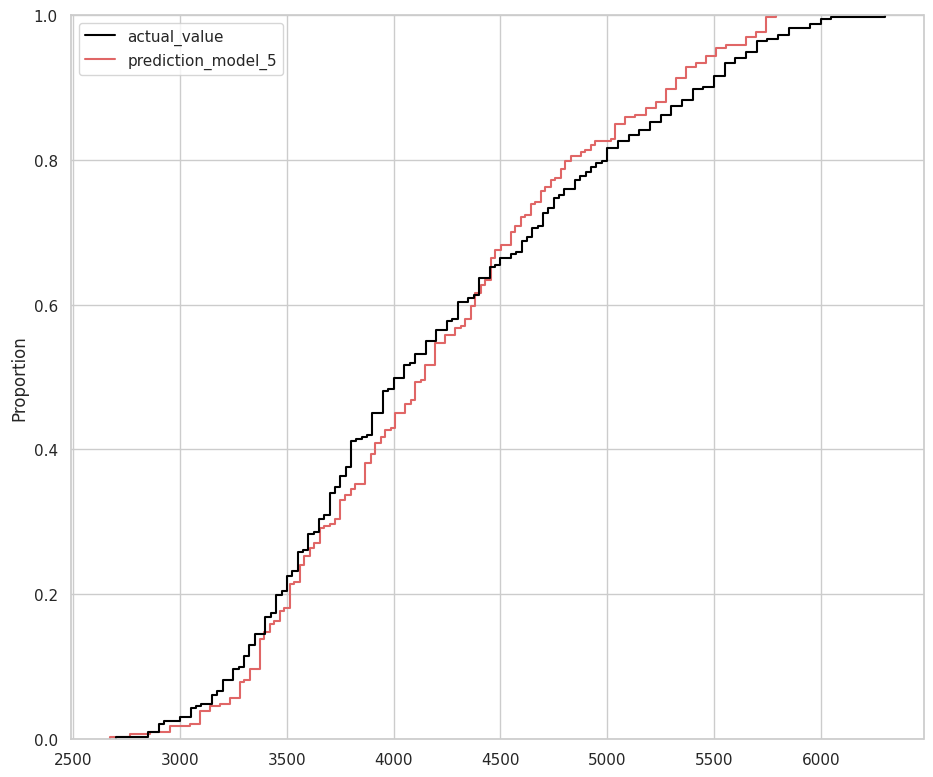

In [86]:
# ECDFs para comparar la predicción del modelo 5 con los valores reales
sns.ecdfplot(
    data = models_results.select_columns(['actual_value', 'prediction_model_5']),
    palette = comparation_color
);

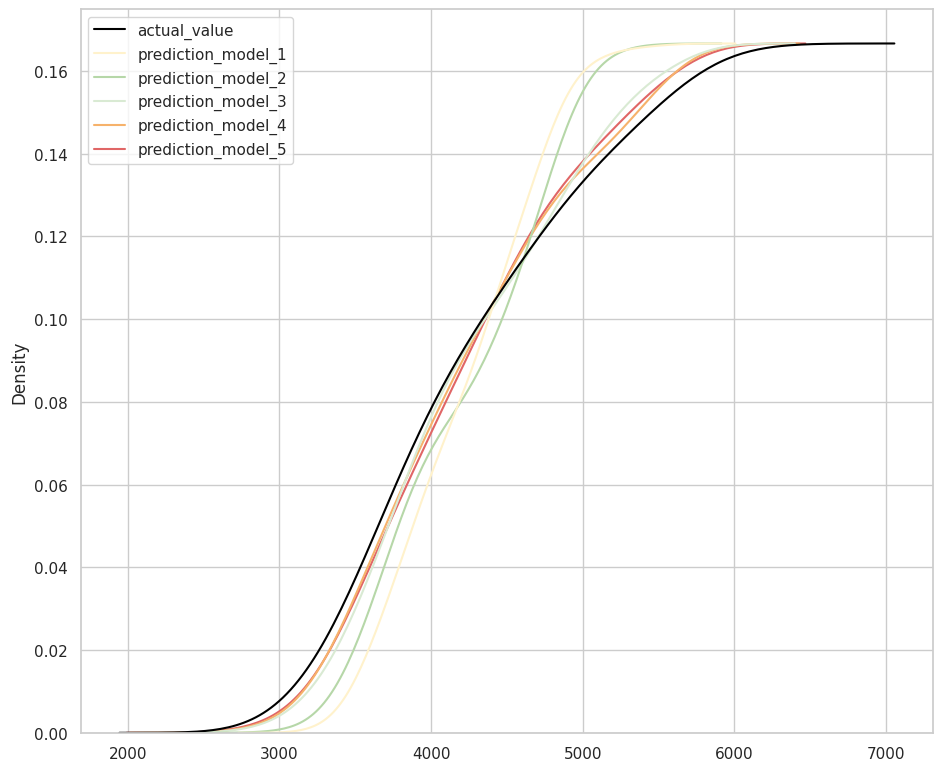

In [87]:
# PDFs para visualizar densidades
sns.kdeplot(
    data = models_results,
    cumulative = True,
    palette = comparation_color
);

### ¿Qué se pudo haber encontrado antes de hacer los modelos?

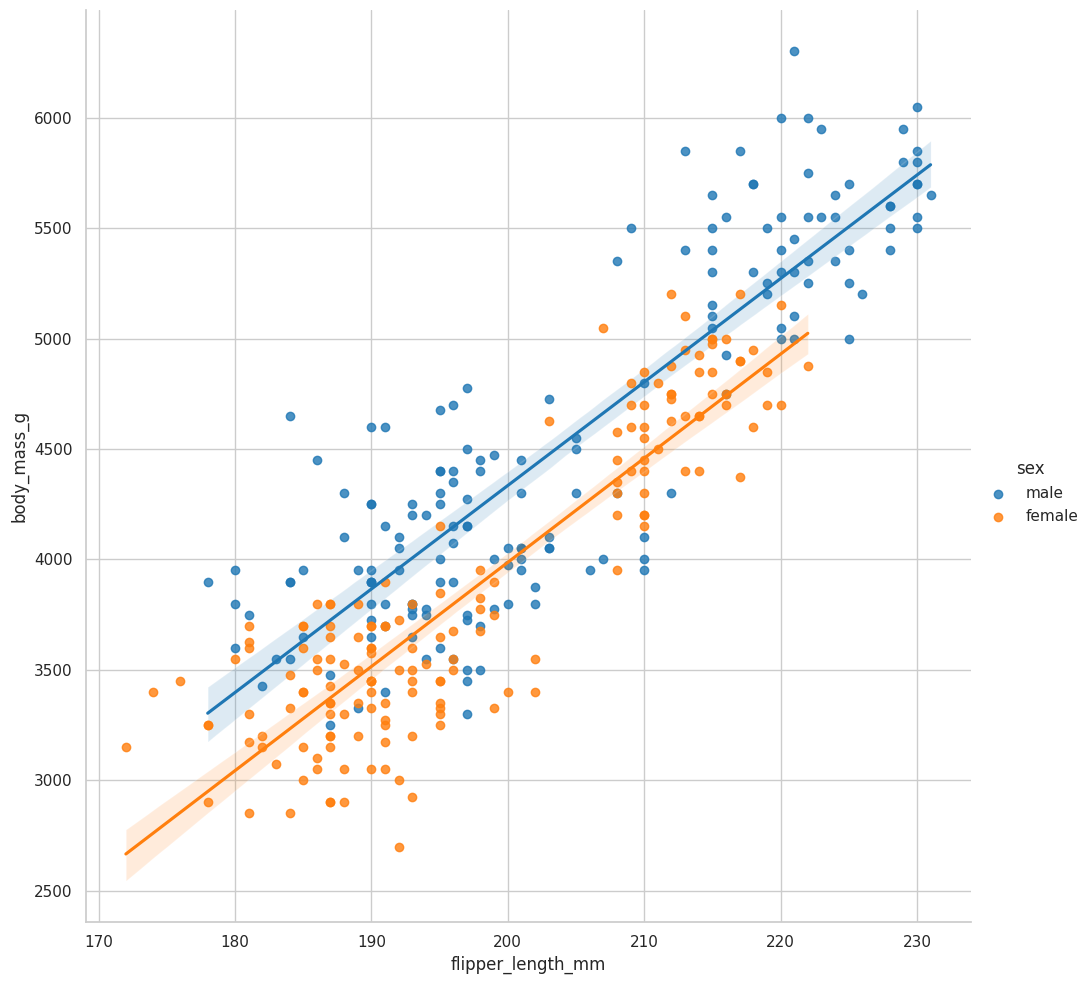

In [88]:
sns.lmplot(
    data = datos_procesados,
    x = 'flipper_length_mm',
    y = 'body_mass_g',
    hue = 'sex',
    height = 10
);

Se pudieron haber encontrado las mismas conclusiones del modelo 5 si en el análisis exporatorio se hubiese experimentado con un gráfico entre la longitud de las aletas y el peso de los pinguinos, utilizando el sexo como variable categórica. El análisis exploratorio de los datos es sumamente importante ya que permite intuir el modelo desde el inicio y de esa manera a ahorrar tiempo.

## Análisis de regresión logística

El análisis de regresión logística es una técnica utilizada para predecir el resultado de una variable categórica (por ejemplo, si un paciente tiene o no una enfermedad, si un votante votará sí o no) basándose en una serie de variables predictoras. Esta técnica se basa en la regresión lineal y se usa para predecir y clasificar los resultados de una variable binaria a partir de un conjunto de variables predictoras.

### Crear un modelo que defina si un pingüino es macho o hembra

Crear el modelo con las variables que se consideren influyentes en la elección de si es un macho o una hembra. La variable objetivo (sexo) es categorica, por tanto, hay que convertirla en numérica para poder aplicar el modelo.

In [89]:
datos_procesados = (
    datos_procesados
    .assign(
        sex_num = lambda df: df.sex.replace(['female', 'male'], [0, 1])
    )
)
# Converir a numérica la variable categórica de sexo da 0 (hembras) y 1 (machos)

In [90]:
# Modelo logístico de la variable sexo vs longitud de las aletas, ancho y largo del pico e isla
smf.logit(
    formula = 'sex_num ~ flipper_length_mm + bill_length_mm + bill_depth_mm + C(island)',
    data = datos_procesados
).fit().summary()

Optimization terminated successfully.
         Current function value: 0.360900
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                sex_num   No. Observations:                  333
Model:                          Logit   Df Residuals:                      327
Method:                           MLE   Df Model:                            5
Date:                Tue, 20 Dec 2022   Pseudo R-squ.:                  0.4793
Time:                        16:21:27   Log-Likelihood:                -120.18
converged:                       True   LL-Null:                       -230.80
Covariance Type:            nonrobust   LLR p-value:                 8.021e-46
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -61.4464      6.944     -8.849      0.000     -75.057     -47.836
C(island)[T.Dream]        -1.5596      0.493     -3.163      0.002      -2.526      -0.593
C(island)[T.Torgersen]    -1.0323      0.599     -1.725      0.085      -2.205       0.141
flipper_length_mm          0.1393      0.024      5.874      0.000       0.093       0.186
bill_length_mm             0.1413      0.045      3.150      0.002       0.053       0.229
bill_depth_mm              1.6401      0.185      8.864      0.000       1.277       2.003
==========================================================================================
"""

Los resultados de la regresión logística en función de los machos arroja los siguientes resultados:

+ A mayor longitud de las aletas, es más probable que el pingüino sea macho (0.1393).
+ A mayor longitud del pico, es más probable que el pingüino sea macho (0.1413).
+ A mayor anchura del pico, es más probable que el pingüino sea macho (1.6401).
+ Es menos probable que hayan machos en la isla Dream respecto a la Biscoe (-1.55).
+ Es menos probable que hayan machos en la isla Torgensen respecto a la Biscoe (-1.03).

### Explorar variables categóricas

Con un EDA inicial de las variables categóricas se podría haber llegado a las mismas conclusiones que el modelo logístico.

In [91]:
# Tabla de conteo de las variables categóricas isla y sexo
(
    datos_procesados
    .value_counts(['island', 'sex'])
    .reset_index(name='count')
)

,island,sex,count
0,Biscoe,male,83
1,Biscoe,female,80
2,Dream,male,62
3,Dream,female,61
4,Torgersen,female,24
5,Torgersen,male,23


### Definir un modelo para identificar si un pingüino pertenece a determinada clase

In [92]:
# Primero, ver cuántas clases hay
datos_procesados.species.unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [93]:
# Asignar una columna is_adelie al dataset. La columna is_adelie tendrá el valor de 1 si la especie es Adelie, 0 si es Gentoo o Chinstrap.
datos_procesados = (
    datos_procesados
    .assign(is_adelie=lambda df: df.species.replace(['Adelie', 'Gentoo', 'Chinstrap'], [1, 0, 0]))
)

In [96]:
# Crear modelo
model_is_adelie = smf.logit(
    formula = 'is_adelie ~ flipper_length_mm + C(sex)',
    data = datos_procesados
).fit()

model_is_adelie.params

Optimization terminated successfully.
         Current function value: 0.355225
         Iterations 8


Intercept            40.568368
C(sex)[T.male]        1.282656
flipper_length_mm    -0.209705
dtype: float64

Según los resultados
+ Es más probable que un pingüino adelie sea macho a que sea hembra.
+ Es menos probable que este pingüino tenga un ala más grande.

## Paradoja de Simpson

Fenómeno en el cual es posible concluir dos cosas totalmente opuestas a partir de los mismos datos, dependiendo el cómo se clasifican estos.

Visualizar siempre los datos para tener una mejor idea de las variables que estan relacionadas.

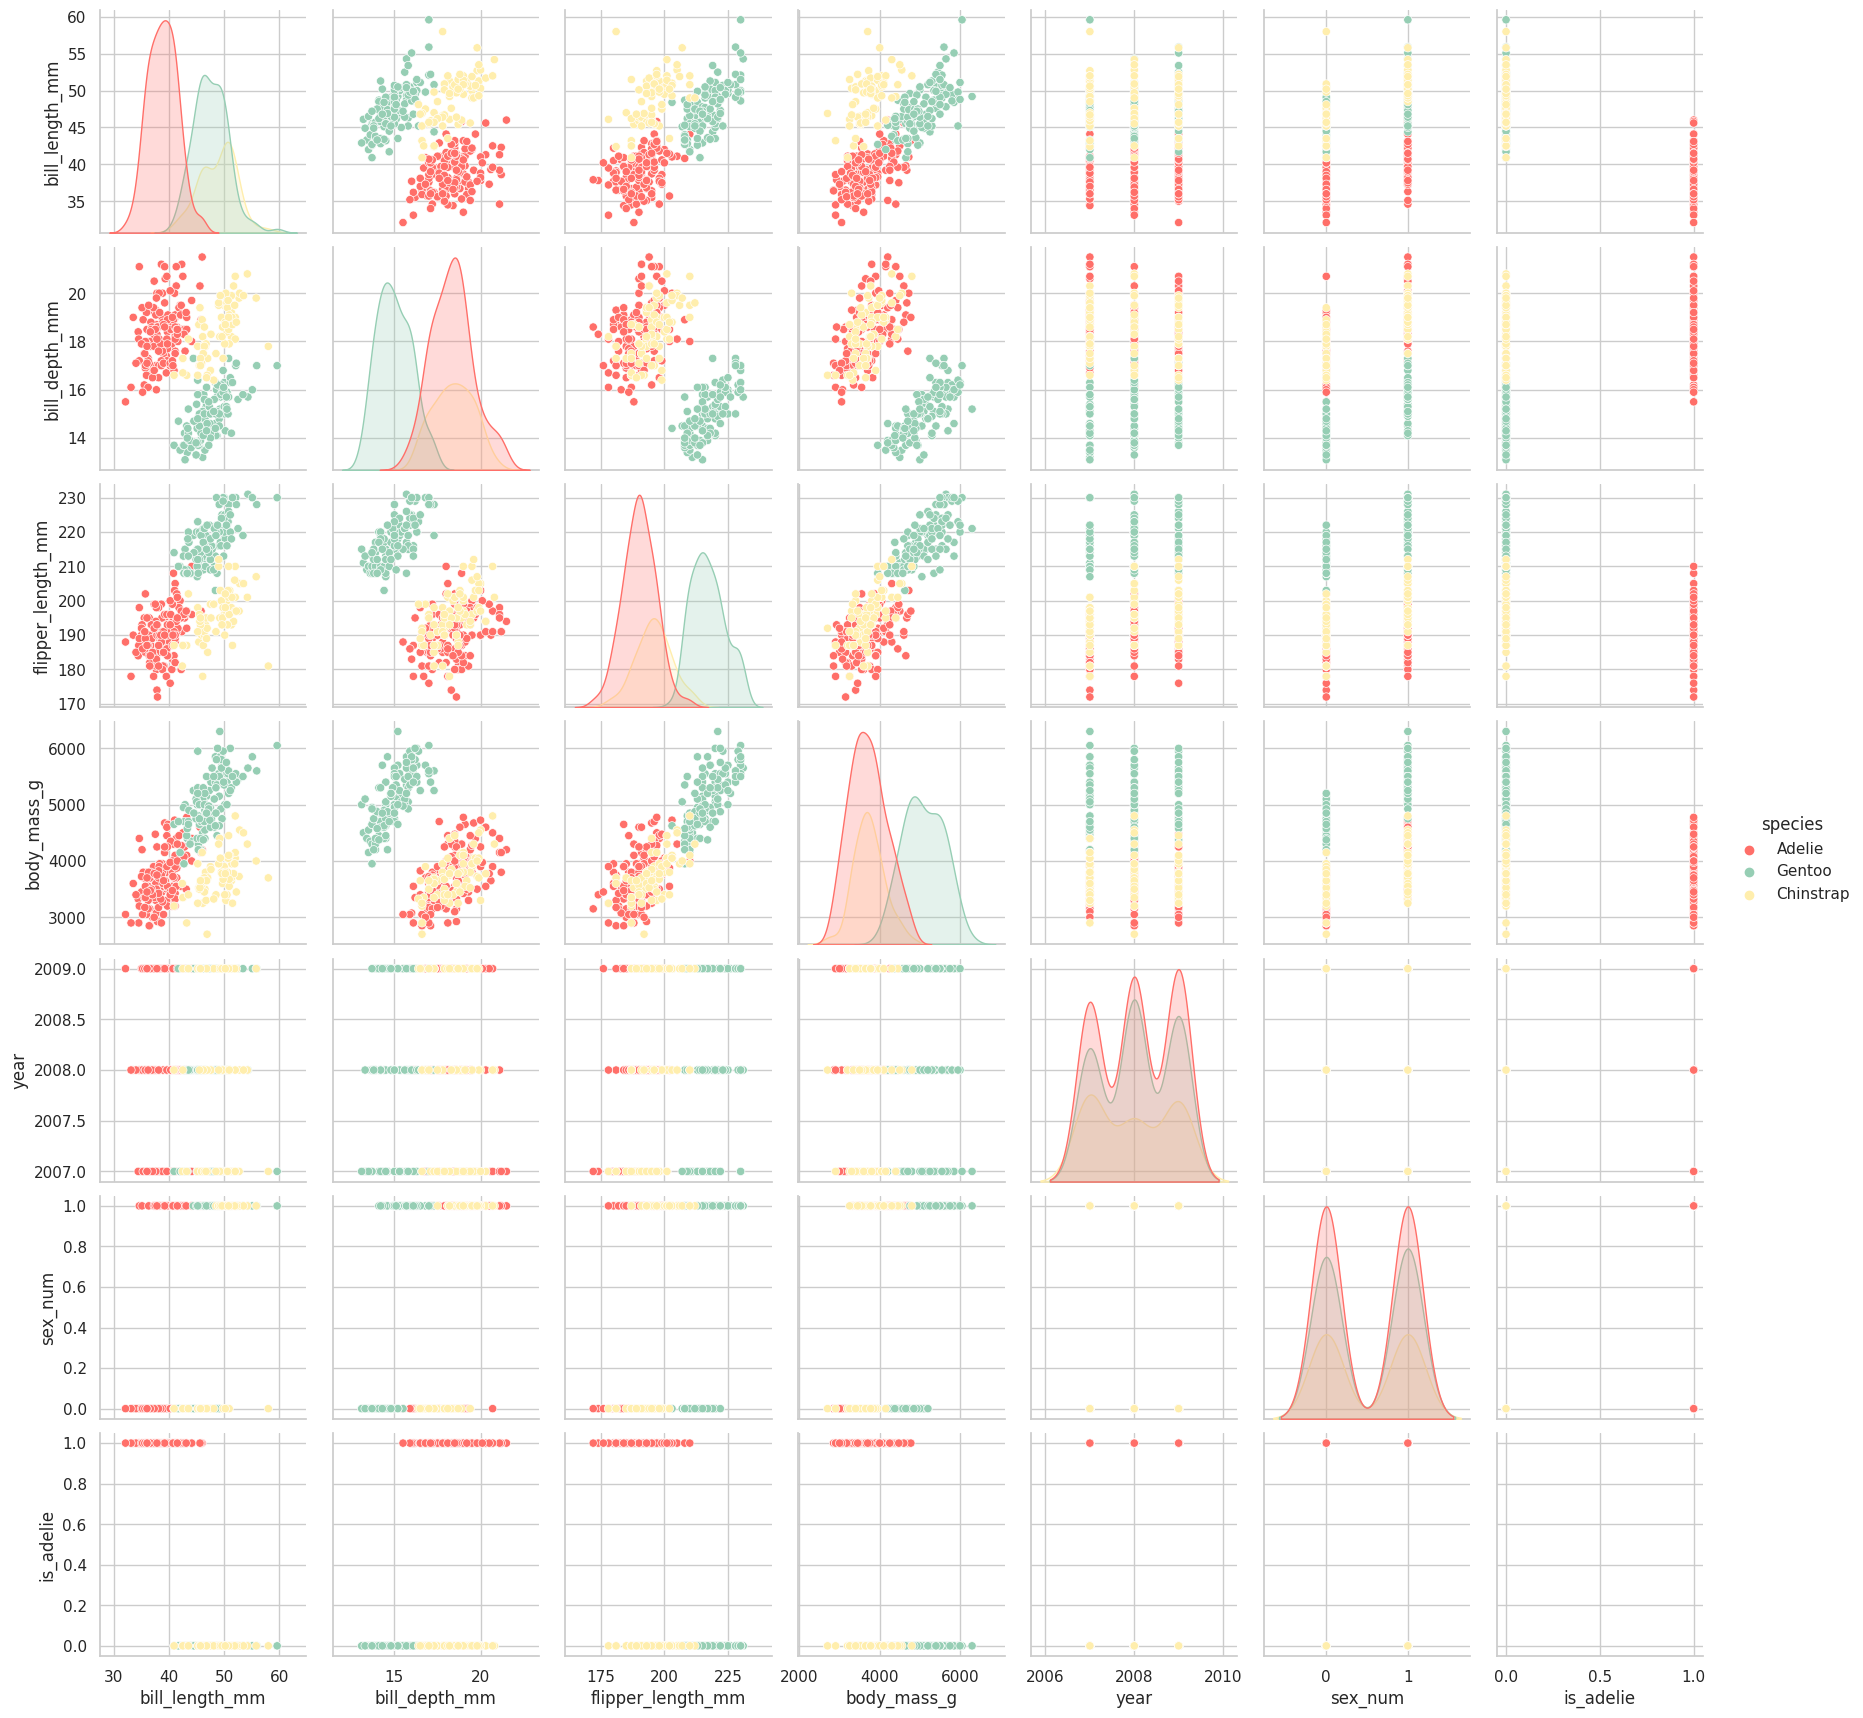

In [97]:
# Exploracion visual de los datos con Seaborn
sns.pairplot(
    data = datos_procesados,
    hue = 'species',
    palette = penguin_color
);

***